# Step 1: Import Necessary Liberaries

In [320]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive visualization
import plotly.express as px

# SimpleImputer for imputiong missing values
from sklearn.impute import SimpleImputer

# Iterative Imputer for imputing missing values using ML models
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For encoding
from sklearn.preprocessing import LabelEncoder

# For scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For normalization
from sklearn.preprocessing import QuantileTransformer

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Pipeline
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Evaluation metrics for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluation metrics for regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the Dataset

In [257]:
df_train = pd.read_csv(r'C:\Users\Admin\Desktop\PYTHON-For-Data-Science_and_AI\00_projects\04_titanic_eda_and_model_for_prediction\data/train.csv')
df_test = pd.read_csv(r'C:\Users\Admin\Desktop\PYTHON-For-Data-Science_and_AI\00_projects\04_titanic_eda_and_model_for_prediction\data/test.csv')
submission = pd.read_csv(r'C:\Users\Admin\Desktop\PYTHON-For-Data-Science_and_AI\00_projects\04_titanic_eda_and_model_for_prediction\data/gender_submission.csv')

# Step 3: Basic Information about the Dataset

In [258]:
# Let's see any 5 values of the dataset
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S


In [259]:
print(f"The shape of training dataset is {df_train.shape} in which we have {df_train.shape[0]} rows and {df_train.shape[1]} columns.") 

print('---------------------------------------------------------------------------------------')

print(f"The shape of training dataset is {df_test.shape} in which we have {df_test.shape[0]} rows and {df_test.shape[1]} columns.") 

The shape of training dataset is (891, 12) in which we have 891 rows and 12 columns.
---------------------------------------------------------------------------------------
The shape of training dataset is (418, 11) in which we have 418 rows and 11 columns.


## 3.1 Training Dataste

In [260]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3.1.1 Observations
1. Here we can see the `column` names and their `data types` which are following:
    1. **7 Numerical Columns**
       - **5 Columns of int64 dtype**
          1.  PassengerID
          2.  Survived
          3.  Pclass
          4.  Sibsp
          5.  Parch
       - **2 Columns of float64 dtype**
          1. Age
          2. Fare
    2. **5 Categorical Columns**
       1. Name
       2. Sex
       3. Ticket
       4. Cabin
       5. Embarked
2. We can see the `missing values` in `Age, Cabin and Embarked` Columns.


## 3.2 Testing Dataset

In [261]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### 3.2.1 Observations
1. Here we can see the `column` names and their `data types` which are following:
    1. **7 Numerical Columns**
       - **4 Columns of int64 dtype**
          1.  PassengerID
          2.  Pclass
          3.  Sibsp
          4.  Parch
       - **2 Columns of float64 dtype**
          1. Age
          2. Fare
    2. **5 Categorical Columns**
       1. Name
       2. Sex
       3. Ticket
       4. Cabin
       5. Embarked
2. We can see the `missing values` in `Age, Cabin and Fare` Columns.


# Step 4: Dealing with Missing Values

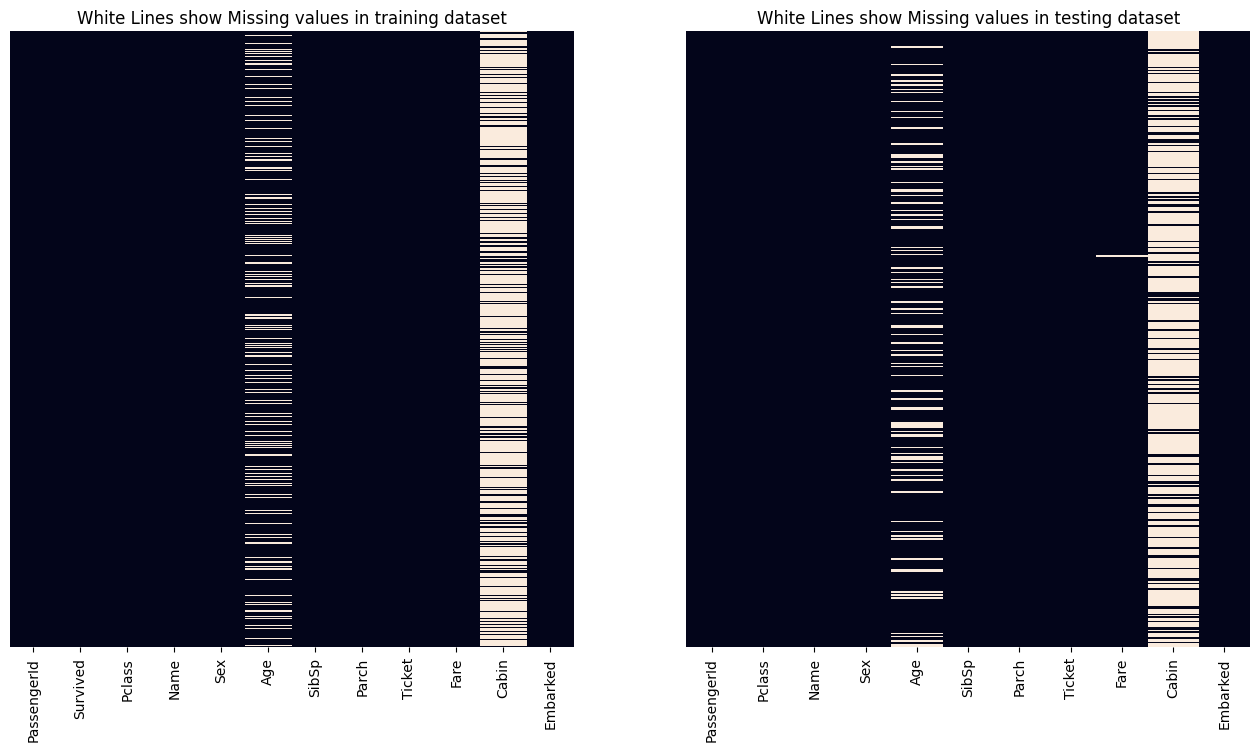

In [262]:
# Let's see the missing values in heatmap
plt.figure(figsize=(16, 8))  

# Display the training dataset heatmap
plt.subplot(1, 2, 1)
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in training dataset')

# Display the testing dataset heatmap
plt.subplot(1, 2, 2)
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in testing dataset')

plt.show()

In [263]:
# Let's see the percentage of missing values in training dataset upto 2 decimal points
missing_values_per = round(df_train.isnull().sum().sort_values(ascending = False) / len(df_train) * 100, 2)
print(missing_values_per)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64


### 4.1.1 Observations
-  Missing values in `Cabin, Age and Embarked` are `77.10%, 19.87% and 0.22%` respectively.

In [264]:
# Let's see the percentage of missing values in testing dataset upto 2 decimal points
missing_values_per = round(df_test.isnull().sum().sort_values(ascending = False) / len(df_test) * 100, 2)
print(missing_values_per)

Cabin          78.23
Age            20.57
Fare            0.24
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Embarked        0.00
dtype: float64


### 4.1.2 Observations
-  Missing values in `Cabin, Age and Fare` are `78.23%, 20.57% and 0.24%` respectively.

In [265]:
# Let's plot missing values

# Plot the missing values in the training dataset
fig1 = px.bar(x=df_train.columns, y=df_train.isnull().sum() / len(df_train) * 100, 
              title='Missing Values in Training Dataset',
              labels={'x': 'Columns', 'y': 'Percentage of Missing Values'})
fig1.show()

# Plot the missing values in the testing dataset
fig2 = px.bar(x=df_test.columns, y=df_test.isnull().sum() / len(df_train) * 100, 
              title='Missing Values in Testing Dataset',
              labels={'x': 'Columns', 'y': 'Percentage of Missing Values'})
fig2.show()

### 4.1.3 Observations
- We can see that `most missing values` in `Cabin Column`.
- So, let's `drop` that column from our dataset.

## 4.2 Drop the Cabin Column

In [266]:
# Dropping Cabin Column from traing and testing datasets 
df_train.drop('Cabin', axis = 1, inplace = True)
df_test.drop('Cabin', axis = 1, inplace = True)

In [267]:
# Again let's check the missing values in traing dataset
round(df_train.isnull().sum().sort_values(ascending = False) / len(df_train) * 100, 2)

Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

In [268]:
# Again let's check the missing values in testing dataset
round(df_test.isnull().sum().sort_values(ascending = False) / len(df_test) * 100, 2)

Age            20.57
Fare            0.24
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Embarked        0.00
dtype: float64

## 4.3 Impute Missing Values in Training Dataset

In [269]:
# Impute missing values in training data set
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [270]:
# Let's check again missing values in training dataset
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 4.4 Impute Missing Values in Testing Dataset

In [271]:
# Impute missing values in testing data set
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [272]:
# Let's check again missing values in testing dataset
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4.5 Observations
- We `successfully imputed` all the missing values from the dataset.

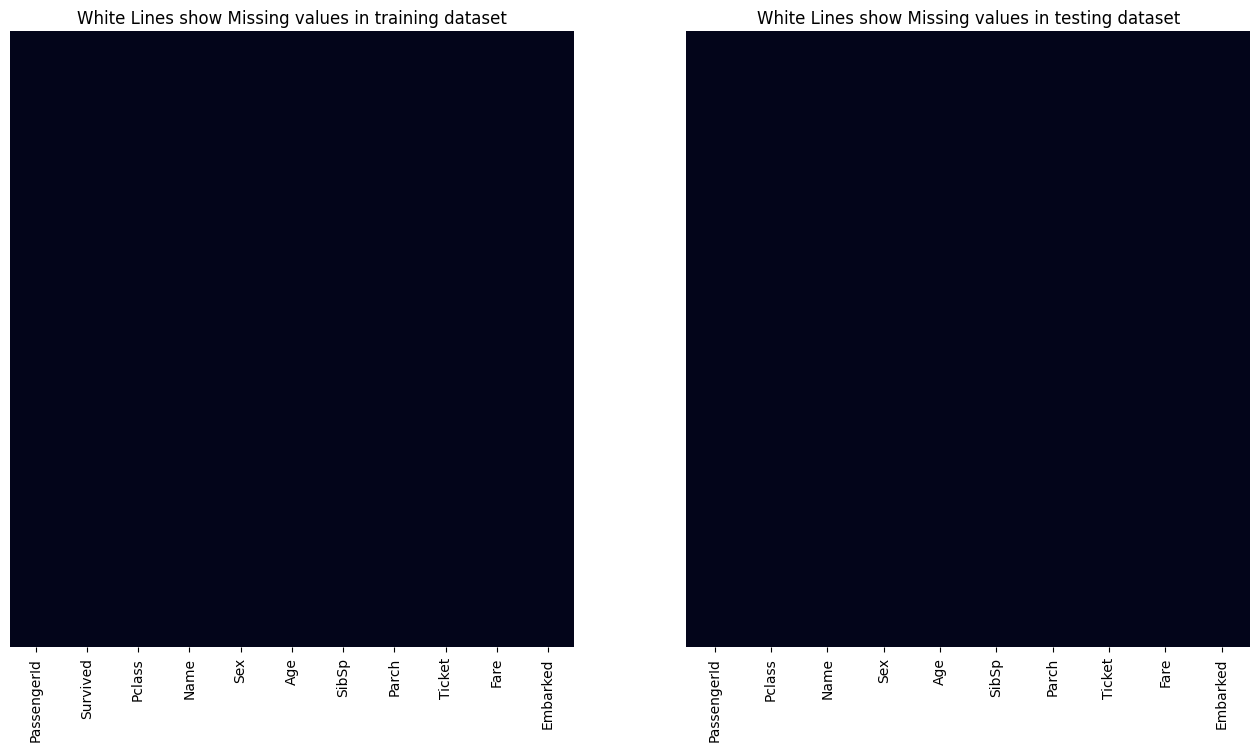

In [273]:
# Let's see the missing values in heatmap again after imputing missing values
plt.figure(figsize=(16, 8))  

# Display the training dataset heatmap
plt.subplot(1, 2, 1)
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in training dataset')

# Display the testing dataset heatmap
plt.subplot(1, 2, 2)
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in testing dataset')

plt.show()

- `No` missing values left.

# Step 5: Check for Duplicates

## 5.1 Duplicates in Training Dataset

In [274]:
df_train.duplicated().sum()

0

### 5.1.1 Observations
- `No duplicates` found in the dataset.

## 5.2 Duplicates in Testing Dataset

In [275]:
df_test.duplicated().sum()

0

### 5.2.1 Observations
- `No duplicates` found in the dataset.

# Step 6: Removing Unnecessary Features

## 6.1 Training Dataset

In [276]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [277]:
df_train.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

### 6.1.1 Observations
- Remove `PassengerId` Column because it will `not help` in our analysis.
- Since we have `Passengerid` so we can `drop Name Feature` because it will not affect prediction during model building.
- `Ticket Column` is also of `no use` so `drop` that feature also.

In [278]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [279]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [280]:
df_test.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

### 6.1.1 Observations
- Remove `PassengerId` Column because it will `not help` in our analysis.
- Since we have `Passengerid` so we can `drop Name Feature` because it will not affect prediction during model building.
- `Ticket Column` is also of `no use` so `drop` that feature also.

In [281]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [282]:
print(f"After cleaning the training dataset we left with {df_train.shape[0]} rows and {df_train.shape[1]} columns.")
print('-----------------------------------------------------------------------')
print(f"After cleaning the training dataset we left with {df_test.shape[0]} rows and {df_test.shape[1]} columns.")

After cleaning the training dataset we left with 891 rows and 8 columns.
-----------------------------------------------------------------------
After cleaning the training dataset we left with 418 rows and 7 columns.


# Step 7: Exploratory Data Analysis (EDA)

In [283]:
df_train.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
711,0,1,male,28.00,0,0,26.55,S
536,0,1,male,45.00,0,0,26.55,S
78,1,2,male,0.83,0,2,29.00,S
300,1,3,female,28.00,0,0,7.75,Q


## 7.1 `Survived Column`

In [284]:
# Let's see the value counts of survived
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

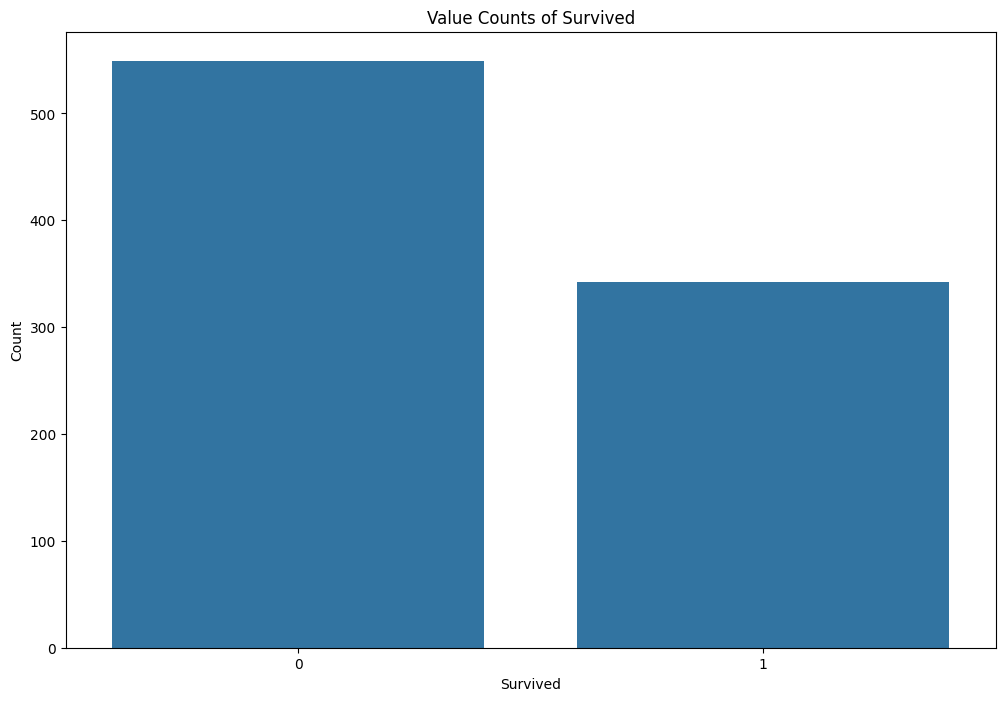

In [285]:
# Let's plot the value counts of the 'Survived' column
plt.figure(figsize=(12, 8))

sns.barplot(x = df_train['Survived'].value_counts().index, y = df_train['Survived'].value_counts())
plt.title('Value Counts of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [286]:
# Let's find out the survival rate upto 2 decimal points
not_survived = 549
survived = 342
total = 891

survival_rate = round((not_survived - survived) / not_survived * 100, 2)
print(survival_rate)

37.7


### 7.1.1 Observations
- From the above graph we can see that most of the people `not survived in titanic accident`.
- The `survival rate was 37.30%` in titanic accident.

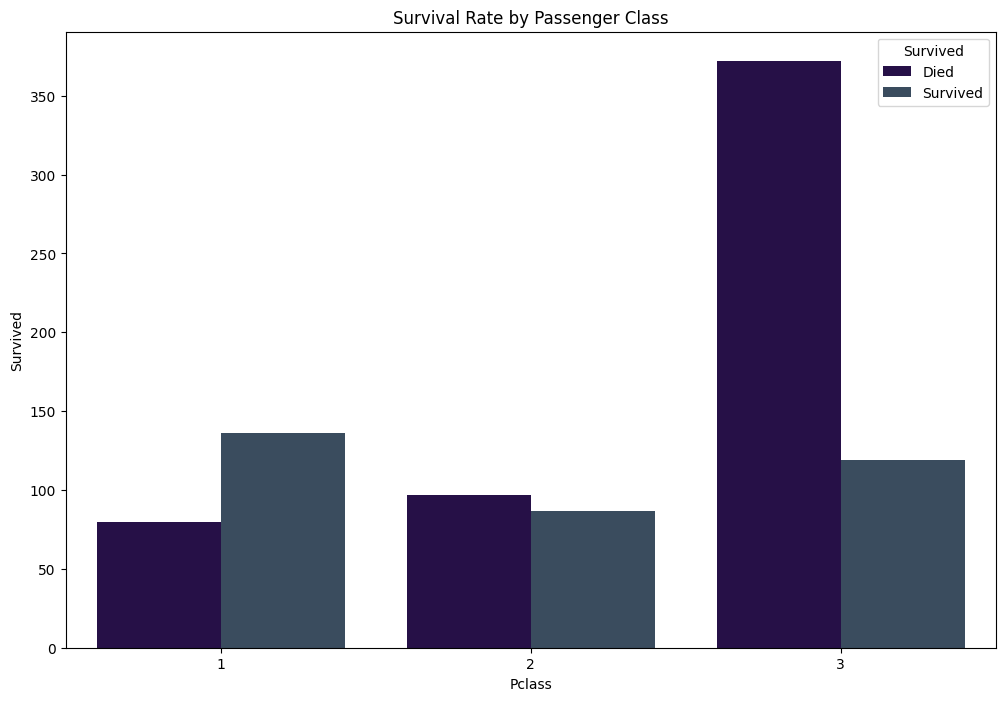

In [287]:
# Let's plot the value counts of the 'Survived' column based on Pclass
plt.figure(figsize=(12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(data = df_train, x = 'Pclass', hue = 'Survived', palette = color)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.legend(title='Survived', labels = ['Died', 'Survived'])
plt.show()

### 7.1.2 Observations
- `Most` of the people who survived was in `1st Pclass` and most of the people who `not survived was in 3rd Pclass`.

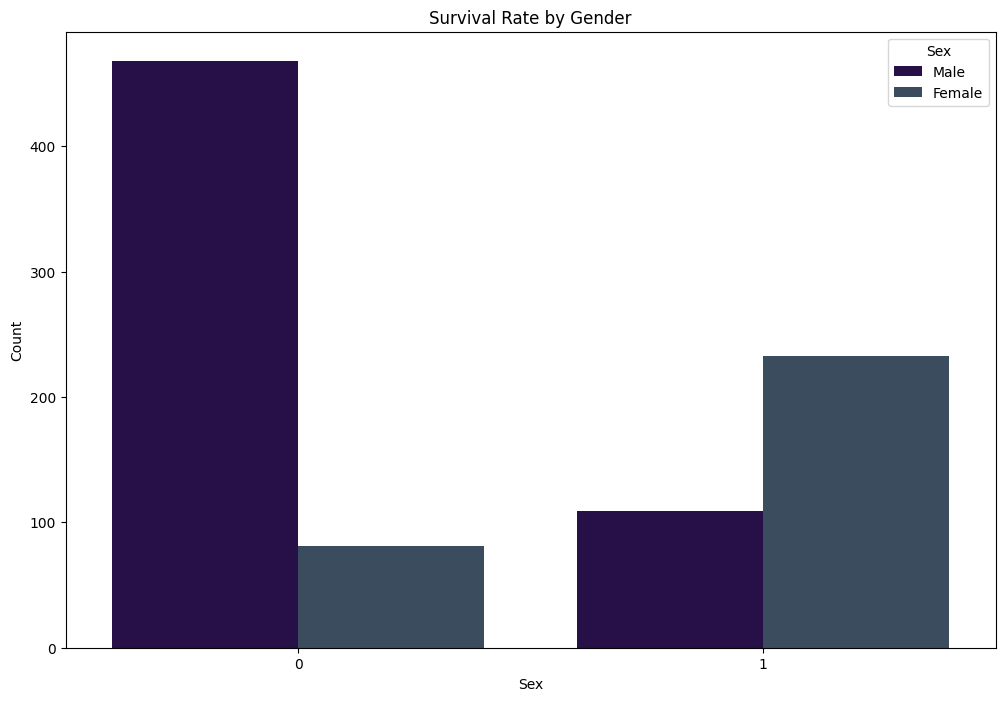

In [288]:
# Let's plot Survived based on Sex column
plt.figure(figsize = (12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(x='Survived', hue='Sex', data=df_train, palette=color)
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title = 'Sex', labels = ['Male', 'Female'])
plt.show()

### 7.1.3 Observations
- We can see that `most Male not survived` and `most Female survived`.

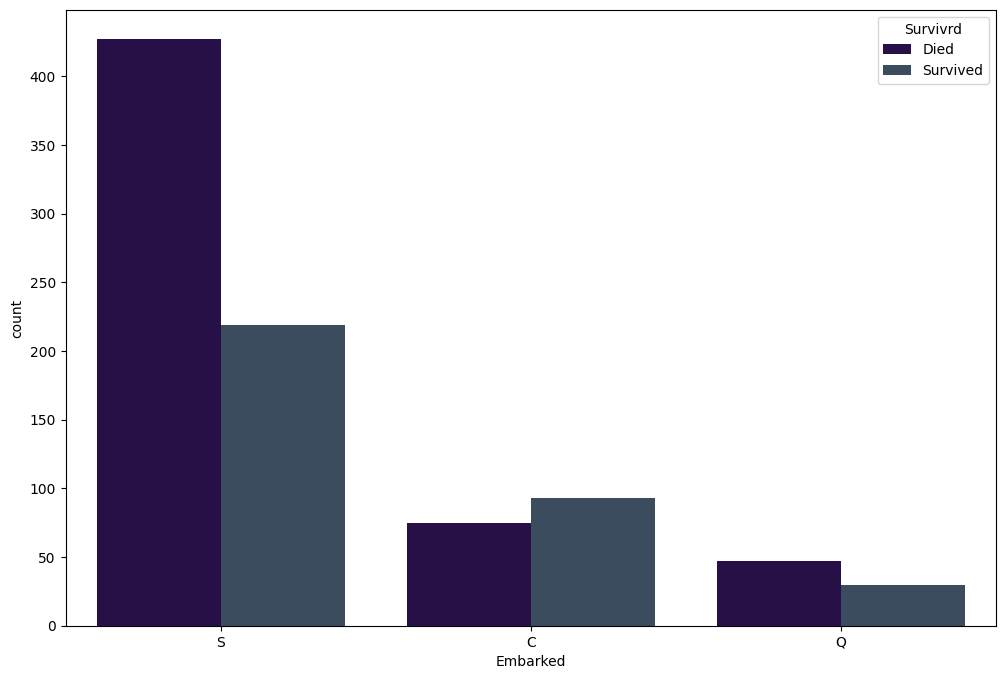

In [289]:
# Let's see survived based on embaarked
plt.figure(figsize = (12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(df_train, x = 'Embarked', hue = 'Survived', palette=color) 
plt.legend(title = 'Survivrd', labels = ['Died', 'Survived'])
plt.show()

### 7.1.4 Observations
- `Most` of the people belonged to `Southampton` and among those `max people not survived`.

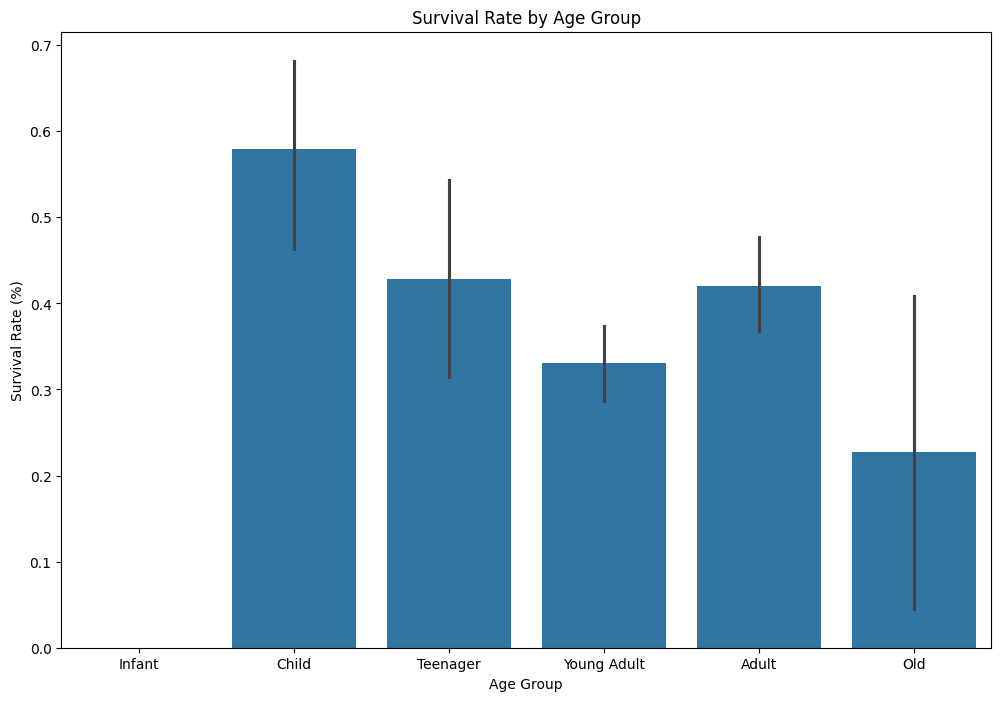

In [290]:
# Let's  plot Survived column based on age
plt.figure(figsize=(12, 8))

# Group the ages into bins
df_train['Age_Group'] = pd.cut(df_train['Age'], bins=[-1, 0, 12, 18, 30, 60, 120], labels=['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Old'])

# Create the bar plot
sns.barplot(x='Age_Group', y='Survived', data=df_train)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.show()

### 7.1.5 Observations
- `Survival` rate of `child` were higher.
- `Old` peoples's survival rate was very `low`.

## 7.2 `Pclass Column`

In [291]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

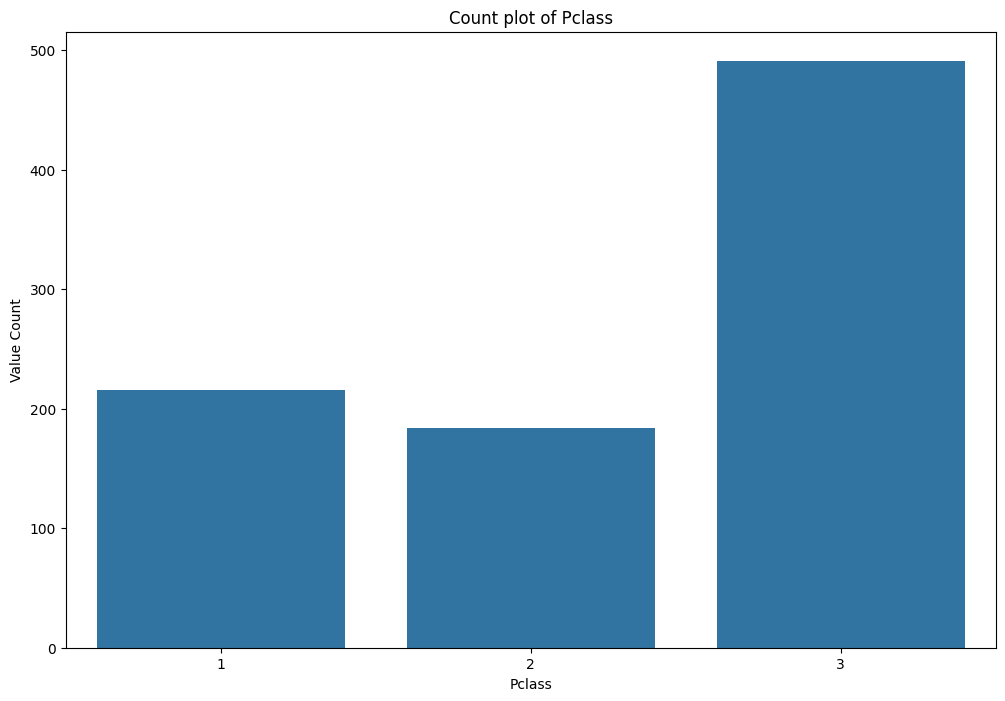

In [292]:
# Let's plot this
plt.figure(figsize = (12, 8))

sns.countplot(df_train, x = 'Pclass')
plt.title('Count plot of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Value Count')
plt.show()

### 7.2.1 Observations
- `Most` of the people were travelling in `3rd class` of titanic.

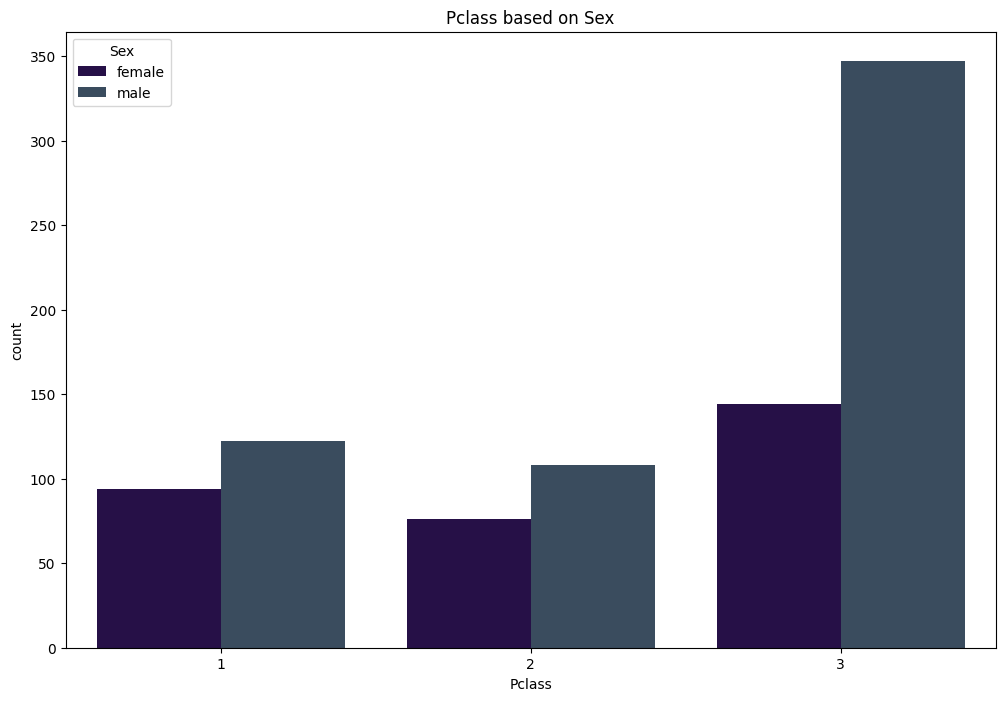

In [293]:
# Let's plot Pclass based on Sex
plt.figure(figsize = (12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(df_train, x = 'Pclass', hue = 'Sex', palette=color)
plt.title('Pclass based on Sex')
plt.show()

### 7.2.2 Observations
- `Most` of the Male and Female both were travelling in `3rd class`.

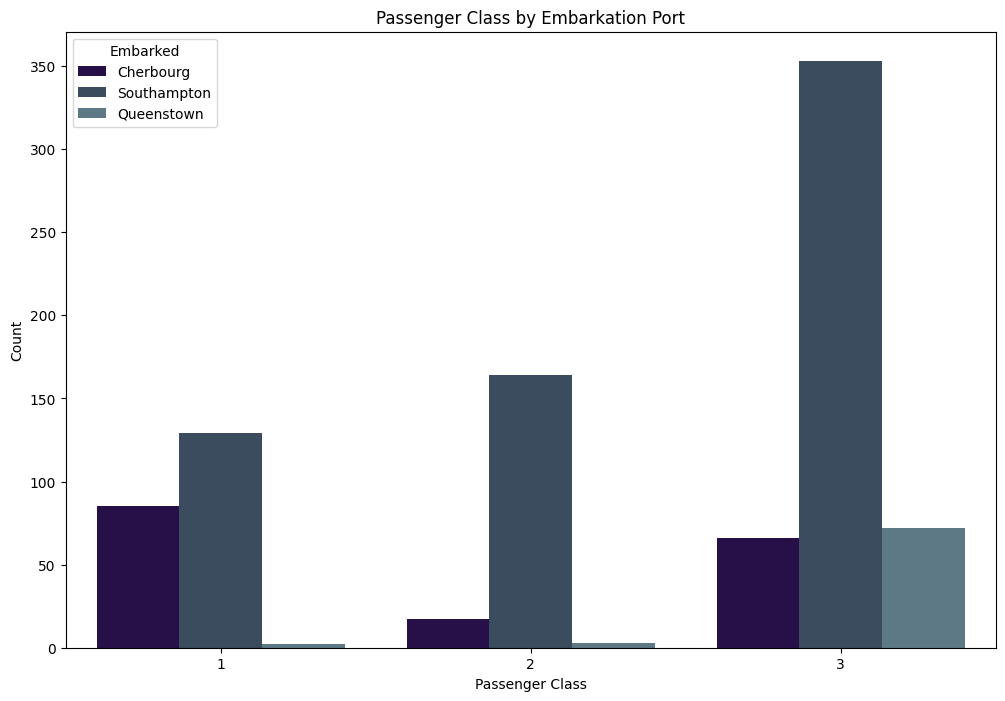

In [294]:
# Let's see the Pclass based on Embarked
plt.figure(figsize = (12, 8))

# Let's define color for each class
color = ['#240750', '#344C64', '#577B8D']

sns.countplot(x='Pclass', hue='Embarked', data=df_train, palette=color)
plt.title('Passenger Class by Embarkation Port')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title = 'Embarked', labels = ['Cherbourg', 'Southampton', 'Queenstown'])
plt.show()

### 7.2.3 Observations
- We can see that most of the people in `3rd class` were from `Cherbourg`.

## 7.3 `Sex Column`

In [295]:
# Let's check the value counts of Sex
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

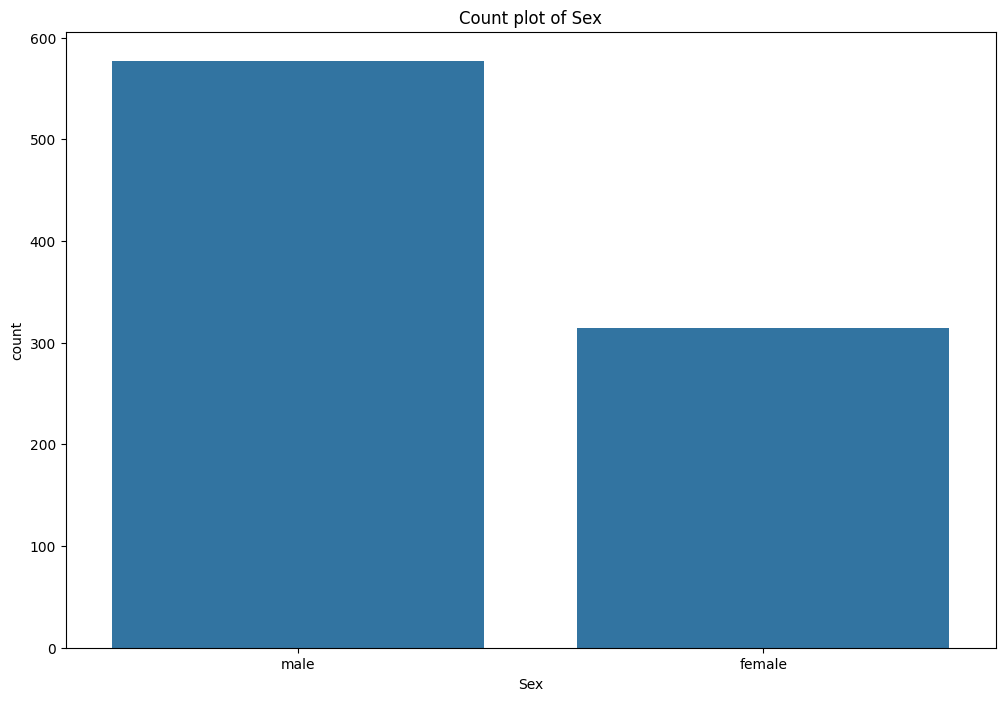

In [296]:
# Let's plot this
plt.figure(figsize = (12, 8))

sns.countplot(df_train, x = 'Sex')
plt.title('Count plot of Sex')
plt.show()

### 7.3.1 Observation
- `Male` were `larger` in number in titanic.

In [297]:
# Let's check the percentage of male and females upto 2 decimal points
per_male = (891 - 577) / 891 * 100
per_female = (891 - 314) / 891 * 100

print(f"The percentage of males is {round(per_male, 2)}% and female is {round(per_female, 2)}% in the dataset.")

The percentage of males is 35.24% and female is 64.76% in the dataset.


In [298]:
# Let's check how many percent males are higher than females
diff = (577 - 314) / 314 * 100
print(f"Males are {round(diff, 2)}% higher than females.")

Males are 83.76% higher than females.


## 7.4 `Age Column`

In [299]:
# Let's check the maximum and minimum age
df_train['Age'].max(), df_train['Age'].min()

(80.0, 0.42)

### 7.4.1 Observations
- The `maximum age` is `80` years.
- The `minimum` age is `0.42` years.

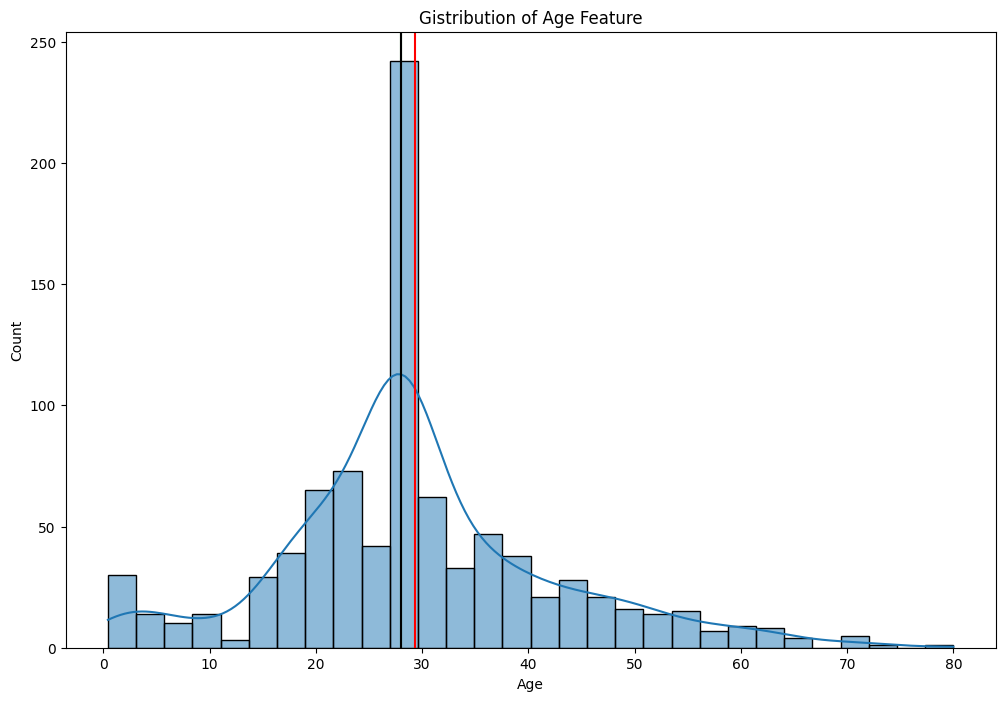

The mean of Age is: 29.36158249158249
The median of Age is: 28.0
The mode of Age is: 28.0


In [300]:
# Let's check the distribution of Age and plot mean, median and mode
plt.figure(figsize = (12, 8))

sns.histplot(df_train, x = 'Age', kde = True)
plt.title('Gistribution of Age Feature')
plt.axvline(df_train['Age'].mean(), color = 'red')
plt.axvline(df_train['Age'].median(), color = 'green')
plt.axvline(df_train['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"The mean of Age is: {df_train['Age'].mean()}")
print(f"The median of Age is: {df_train['Age'].median()}")
print(f"The mode of Age is: {df_train['Age'].mode()[0]}")

### 7.4.2 Observation
- `Age` is `normaly` distributed.
- Mean is 29.36.
- Median and Mode are equal and their value is 28.

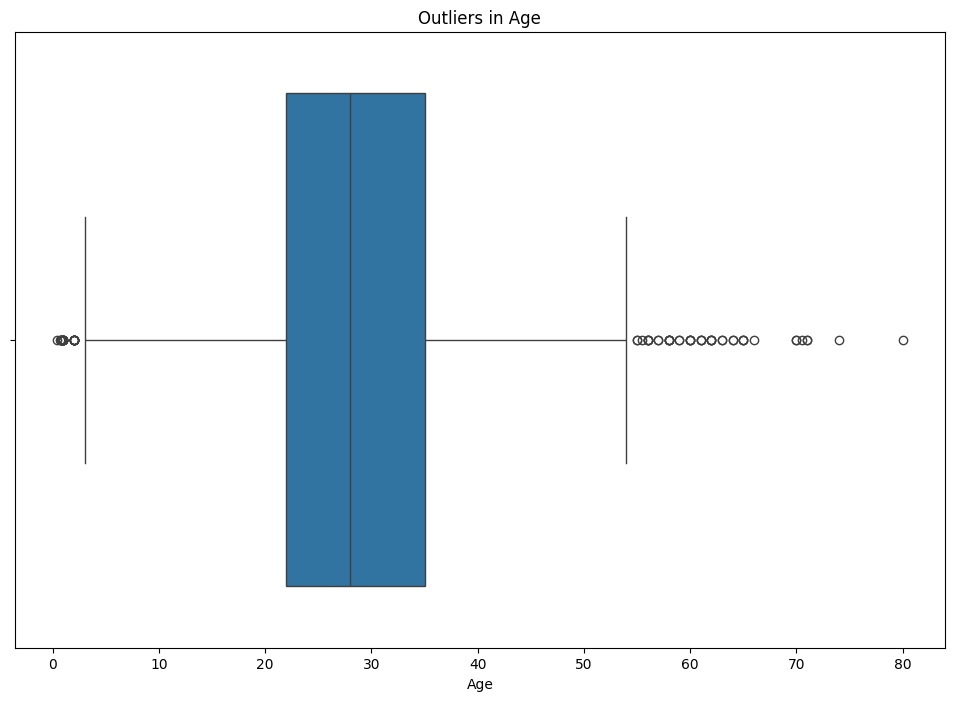

In [301]:
# Let's check outliers in Age
plt.figure(figsize = (12, 8))

sns.boxplot(df_train, x = 'Age')
plt.title('Outliers in Age')
plt.show()

### 7.4.3 Observations
- `No` outliers in `Age` feature.

## 7.5 `Fare Column`

In [302]:
# Let's check the maximum and minimum Fare
df_train['Fare'].max(), df_train['Fare'].min()

(512.3292, 0.0)

### 7.5.1 Observations
- The `maximum fare` is `512.32`.
- The `minimum fare` is `0`.

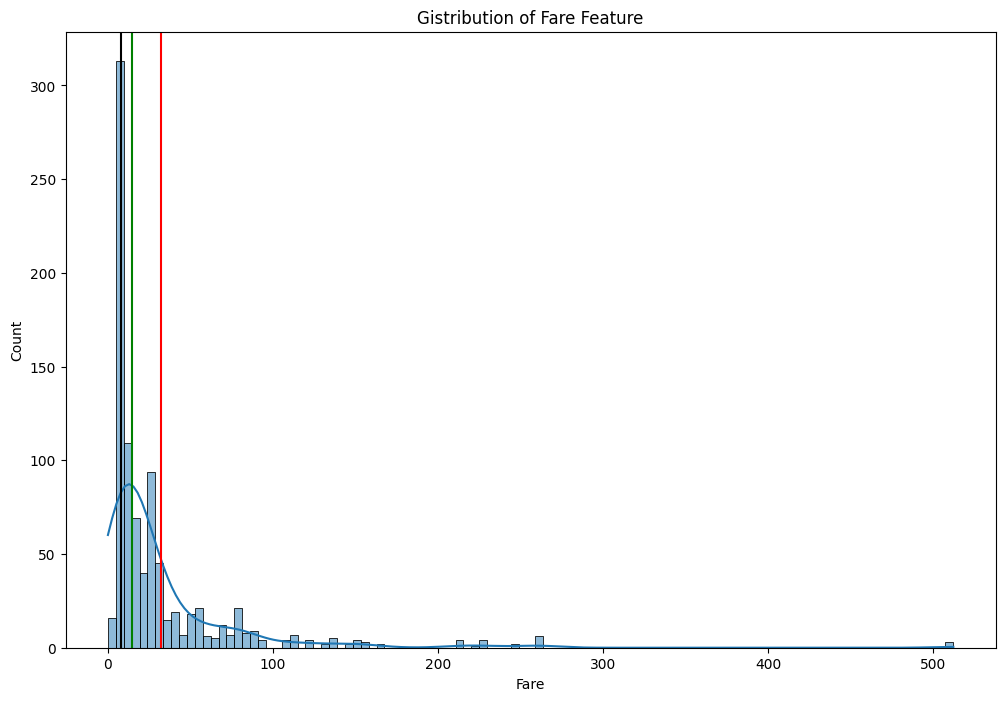

The mean of Fare is: 32.204207968574636
The median of Fare is: 14.4542
The mode of Fare is: 8.05


In [303]:
# Let's check the distribution of fare and plot mean, median and mode
plt.figure(figsize = (12, 8))

sns.histplot(df_train, x = 'Fare', kde = True)
plt.title('Gistribution of Fare Feature')
plt.axvline(df_train['Fare'].mean(), color = 'red')
plt.axvline(df_train['Fare'].median(), color = 'green')
plt.axvline(df_train['Fare'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"The mean of Fare is: {df_train['Fare'].mean()}")
print(f"The median of Fare is: {df_train['Fare'].median()}")
print(f"The mode of Fare is: {df_train['Fare'].mode()[0]}")

### 7.5.2 Observation
- `Fare` is `not normaly` distributed.
- `Mean` is `32.20`.
- `Median` is `14.45`.
- `Mode` is `8.05`.

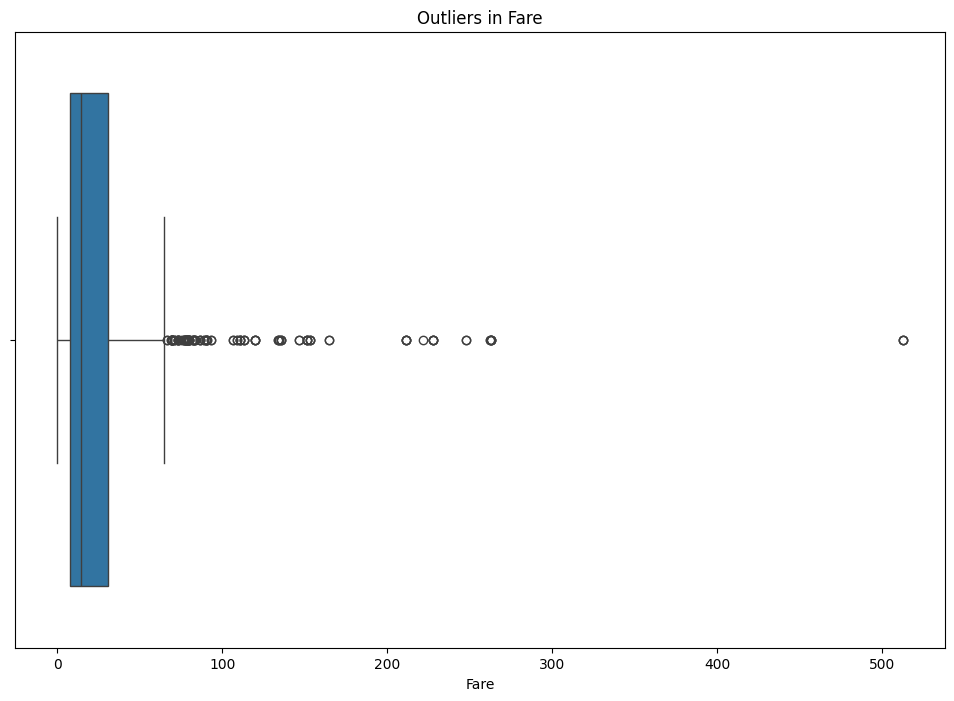

In [304]:
# Let's check outliers in Fare
plt.figure(figsize = (12, 8))

sns.boxplot(df_train, x = 'Fare')
plt.title('Outliers in Fare')
plt.show()

In [305]:
# Let's check those passengers who paid no Fare in titanic
df_train[df_train['Fare'] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
179,0,3,male,36.0,0,0,0.0,S,Adult
263,0,1,male,40.0,0,0,0.0,S,Adult
271,1,3,male,25.0,0,0,0.0,S,Young Adult
277,0,2,male,28.0,0,0,0.0,S,Young Adult
302,0,3,male,19.0,0,0,0.0,S,Young Adult
413,0,2,male,28.0,0,0,0.0,S,Young Adult
466,0,2,male,28.0,0,0,0.0,S,Young Adult
481,0,2,male,28.0,0,0,0.0,S,Young Adult
597,0,3,male,49.0,0,0,0.0,S,Adult
633,0,1,male,28.0,0,0,0.0,S,Young Adult


### 7.5.3 Observations
- We can see that `15 Passengers` are travelling in titanic `without paying` so these are `outliers` because nobody is allowed to travel without paying.

In [306]:
# Filter out the data where Fare = 0
df_train = df_train[df_train['Fare'] != 0]

In [307]:
# Now, again the for those rows whera Fare is 0
df_train[df_train['Fare'] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group


### 7.5.4 Observations
- We `removed` the `outliers` from the `Fare` feature.

# 7.6 `SibSp Column`

In [308]:
# Let's check the value counts of SibSp 
df_train['SibSp'].value_counts()

SibSp
0    593
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

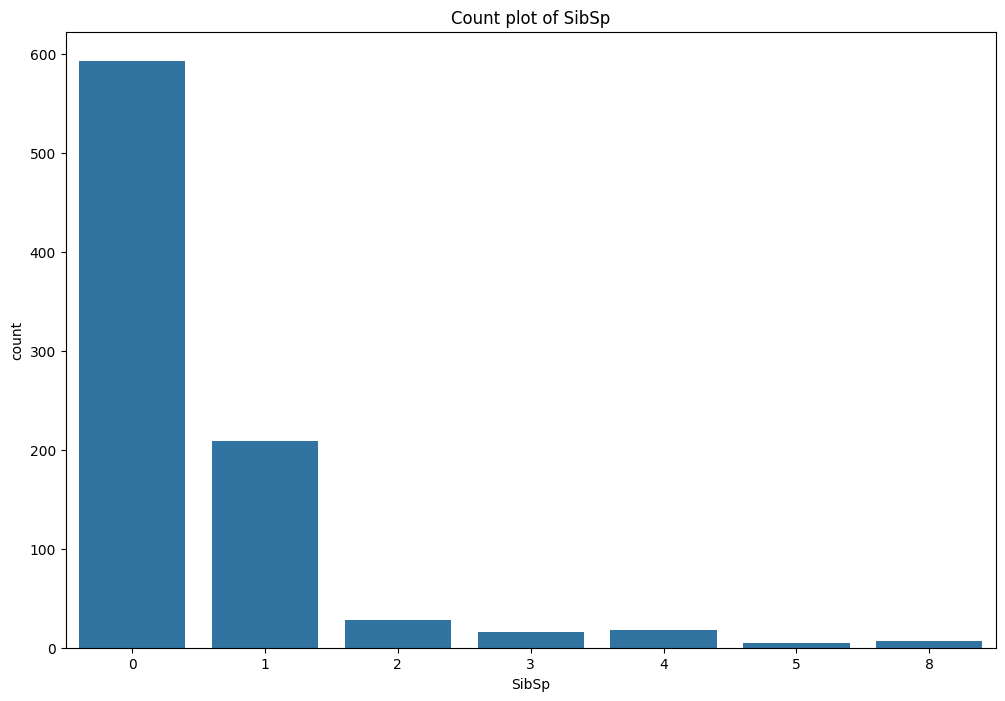

In [309]:
# Let's plot that 
plt.figure(figsize = (12, 8))

sns.countplot(df_train, x = 'SibSp')
plt.title('Count plot of SibSp')
plt.show()

### 7.6.1 Observations
- We can see that `most` of passengers were travelling with `0 SibSp`.

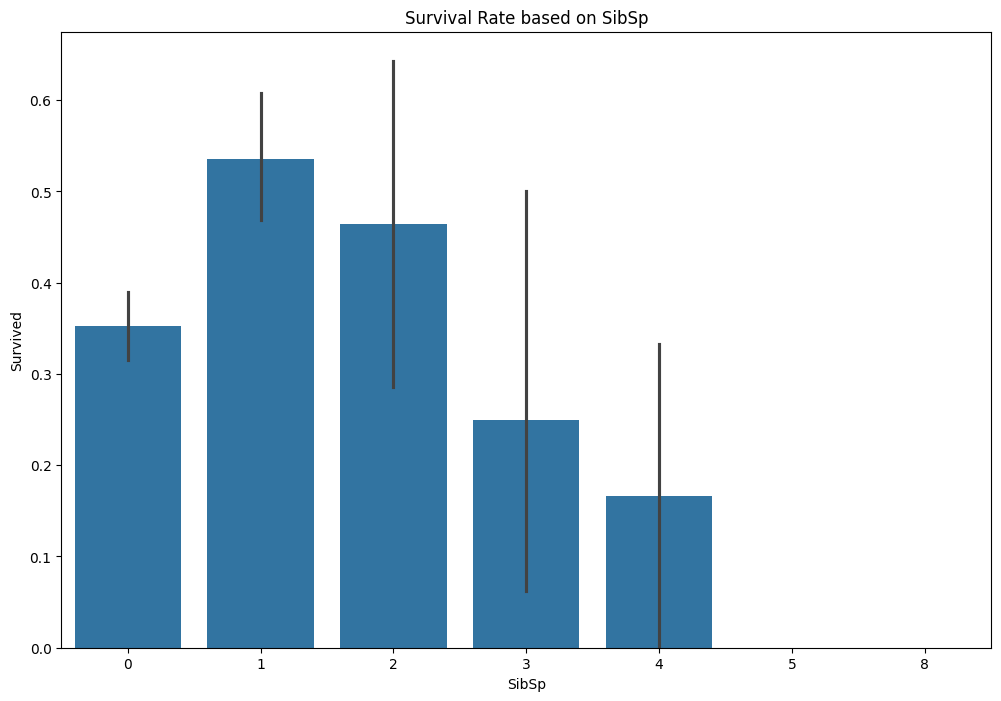

Percentage of SibSp = 0 who survived: 35.24451939291737
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


In [310]:
## Let's check the affect of SibSp on Survived 
plt.figure(figsize = (12, 8))

sns.barplot(df_train, y = 'Survived', x = 'SibSp')
plt.title('Survival Rate based on SibSp')
plt.show()

# Let's print the percentages of survival rate based on SibSp
print("Percentage of SibSp = 0 who survived:", df_train["Survived"][df_train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df_train["Survived"][df_train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df_train["Survived"][df_train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 3 who survived:", df_train["Survived"][df_train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 4 who survived:", df_train["Survived"][df_train["SibSp"] == 4].value_counts(normalize = True)[1]*100)

### 7.6.2 Observations
- `Generally`, it's clear that people with `more siblings` or spouses aboard were less likely to survive. However,` contrary to expectations`, people with no siblings or spouses were less to likely to survive than those with one or two.

In [311]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
0,0,3,male,22.0,1,0,7.2500,S,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,Adult
2,1,3,female,26.0,0,0,7.9250,S,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,Adult
4,0,3,male,35.0,0,0,8.0500,S,Adult


# Step 8: Normalization

In [312]:
# We have seen above that our Age Column is not completely normaly distrubuted and Fare Column is right skewwed so now we are going to normalize these two features

# Call the Quntile Transformer
qun_tra = QuantileTransformer(output_distribution = 'normal')

for col in df_train.columns:
    if df_train[col].dtype == 'float64':
        df_train[col] = qun_tra.fit_transform(df_train[[col]])

for col in df_test.columns:
    if df_test[col].dtype == 'float64':
        df_test[col] = qun_tra.fit_transform(df_test[[col]])

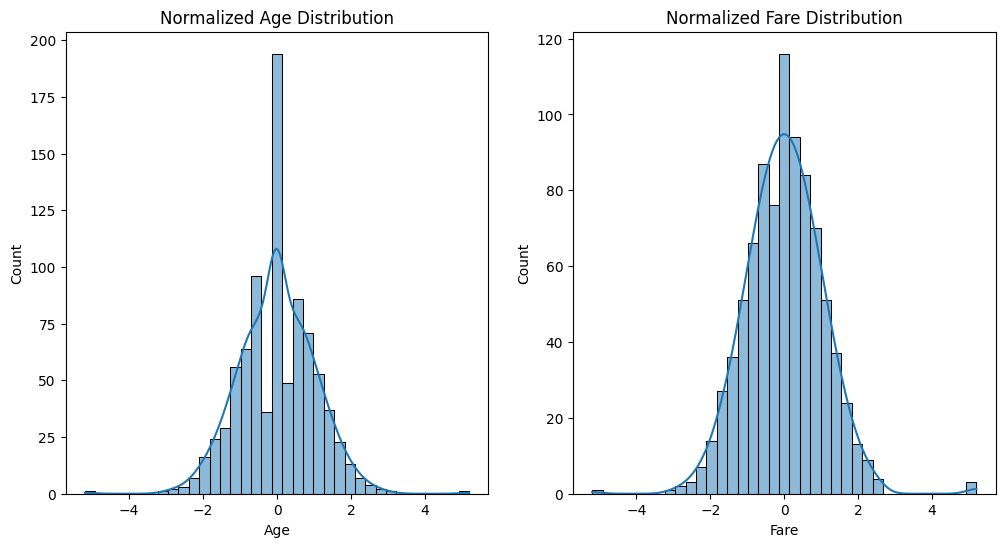

In [313]:
# Now let's plot Age and Fare distribution

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_train['Age'], kde = True)
plt.title('Normalized Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_train['Fare'], kde = True)
plt.title('Normalized Fare Distribution')

plt.show()


In [314]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
0,0,3,male,-0.686225,1,0,-1.482205,S,Young Adult
1,1,1,female,0.827418,1,0,1.192302,C,Adult
2,1,3,female,-0.381466,0,0,-0.684413,S,Young Adult
3,1,1,female,0.668209,1,0,0.978150,S,Adult
4,0,3,male,0.668209,0,0,-0.572686,S,Adult


# Step 9: Encoding

In [318]:
# Let's encode Sex, Embarked and Age_Group Column using LabelEncoder
# Call the label encoder 
lbe = LabelEncoder()

for col in df_train.columns:
    if df_train[col].dtype == 'object' or df_train[col].dtype == 'category':
        df_train[col] = lbe.fit_transform(df_train[[col]])

for col in df_test.columns:
    if df_test[col].dtype == 'object' or df_test[col].dtype == 'category':
        df_test[col] = lbe.fit_transform(df_test[[col]])


In [319]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
0,0,3,1,-0.686225,1,0,-1.482205,2,4
1,1,1,0,0.827418,1,0,1.192302,0,0
2,1,3,0,-0.381466,0,0,-0.684413,2,4
3,1,1,0,0.668209,1,0,0.978150,2,0
4,0,3,1,0.668209,0,0,-0.572686,2,0


# Step 10: Scaling

In [321]:
# Let's scale our data into same units using MinMaxScalar
# Call the Scalar
mms = MinMaxScaler()

for col in df_train.columns:
    df_train[col] = mms.fit_transform(df_train[[col]])

for col in df_test.columns:
    df_test[col] = mms.fit_transform(df_test[[col]])

In [324]:
# Now, let's see how our data looklike
df_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
552,0.0,1.0,1.0,0.498347,0.000,0.000000,0.408567,0.5,1.00
193,1.0,0.5,1.0,0.318726,0.125,0.166667,0.535797,1.0,0.25
484,1.0,0.0,1.0,0.457316,0.125,0.000000,0.646368,0.0,1.00
786,1.0,1.0,0.0,0.397579,0.000,0.000000,0.364880,1.0,0.75
79,1.0,1.0,0.0,0.535354,0.000,0.000000,0.479881,1.0,1.00


# Step 11: Machine Leaning